# 입문 - 사용가이드

원문 : [Matplotlib 시작하기](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

---

## 간단한 예제

- matplotlib는 데이터를 figure(windows, jupyter widget등) 위에 그래프를 그린다.
- 각 figure는 하나 혹은 그 이상의 Axes를 포함할 수 있다.
- Axes는 각 점들이 XY좌표(또는 쎄타-r, xyz좌표 in 3D plot)로 명시될 수 있는 영역이다.
- 하나의 Axes와 함께 하나의 figure를 생성하는 가장 쉬운 방법은 pyplot.subplot을 사용하는 것이다.
- 그러면 데이터를 해당 Axes에 그리기위해 Axes.plot을 사용할 수 있다.

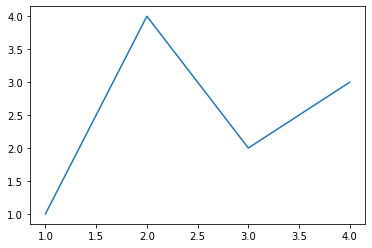

In [3]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

- MATLAB 같은 다른 plotting library나 언어에서는 명시적으로 axes를 생성하라고 하지않고 그래프를 그린다.
- 사실 matplotlib에서도 같은 것을 할 수 있다.
- 각 Axes 그래프 함수마다, matplotlib.pyplot안에 상응하는 함수가 있다.
- 이 함수는 현재 Axes에 그림을 그리고 figure, axes가 없을 땐 axes와 parent figure도 만들어낸다.

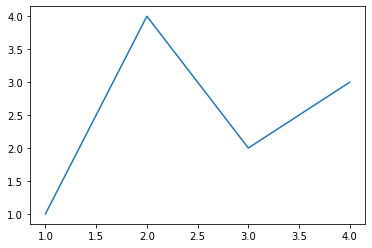

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

---

## Figure의 구성

![Figure의 구성](https://matplotlib.org/_images/anatomy.png)

#### Figure

- 전체 Figure를 의미
- figure는 모든 자식 Axes와 특별 artist(title, figure legend)의 smattering(겉핥기?), canvas의 정보를 가지고 있다.
- (canvas에 대해서 너무 걱정말자. 이것은 실제로 그림을 그리는 객체이긴 하지만 사용자에게 보이진 않기 때문에 신경쓸 필요가 없다.)
- figure에는 여러 Axes가 포함될 수 있지만, 일반적으로 최소 하나의 Axes를 가진다.
- pyplot으로 새로운 figure를 만드는 가장 쉬운 방법은 아래 코드이다.
- figure와 함께 axes를 만드는 것은 편리하다.
- 나중에 axes를 추가하는 것도 가능하다. (복잡한 axes Layout이 가능)

<Figure size 432x288 with 0 Axes>

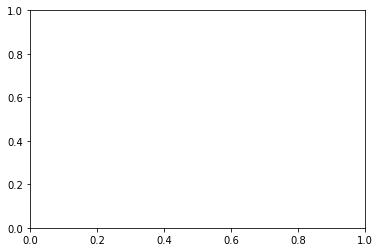

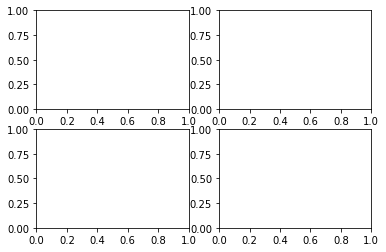

In [5]:
fig = plt.figure() # Axes없이 빈 figure 생성
fig, ax = plt.subplots() # 하나의 Axes를 갖는 하나의 figure 생성
fig, axs = plt.subplots(2, 2) # 2*2 Axes를 갖는 하나의 figure 생성

#### Axes

- 우리가 'plot'이라고 생각하는 부분! 데이터공간이 있는 이미지영역!
- figure는 여러 Axes를 포함할 수 있으나, Axes는 하나의 figure에만 속한다.
- Axes는 2개(3D인경우 3개)의 축(axis) 객체(object)를 갖는다.
- Axes와 Axis는 다르다는 것을 구분하자!
- axes는 'axes.Axes.set_xlim()'과 'axes.Axes.set_ylim()'함수로 데이터(한도)제한을 한다.
- 각 axes는 title이 있고 set_title()함수로 설정할 수 있다.
- 각 axes는 x_label, y_label이 있고 set_xlabel(), set_ylabel()함수로 설정할 수 있다.
- Axes클래스와 멤버함수들은 객체지향 인터페이스의 주요 진입적이다.

#### Axis

- 이것은 수직선(number-line)과 나타내는 객체이다.
- 그래프의 한계를 설정하고, tick(축상의 마크)를 생성하고 ticklables(tick을 표시하는 문자)를 생성한다.
- tick의 위치는 'Locator' 객체에 의해 결정된다.
- ticklabel은 'Formatter' 객체에 의해 format이 결정된다.
- 'Locator'와 'Formatter'를 잘 사용하면 tick의 윛치와 lable을 잘 Control 할 수 있다.

#### Artist

- 기본적으로 figure에서 볼 수 있는 모든 것들은 Artist이다. (Axes, figure, Axis 조차도...)
- 이것은 Text, Line2D, collections, patch 객체들을 포함한다.
- figure가 렌더링될 때, 모든 artist들은 canvas에 그려진다.
- 대부분의 Artist들은 Axes에 묶여있다.
- 이런 Artist들은 여러 Axes에 공유되거나, 하나의 Axes에서 다른 Axes로 이동할 수 없다.

---

## Types of inputs to plotting functions

그리기 함수의 입력값의 타입

- 모든 그리기 함수는 입력값으로 numpy.array 혹은 numpy.ma.masked_array를 기대한다.
- pandas 데이터 객체와 numpy.matrix 같은 'array-like'한 객체들은 의도한대로 동작할 수도 그렇지 않을 수도 있다.
- 그리기 이전 numpy.array로 변환하는 것이 가장 좋다.

In [9]:
# pandas DataFrame 변환
import pandas as pd

a = pd.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values

In [10]:
# numpy.matrix 변환
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)

---

## The object-oriented interface and the pyplot interface

Matplotlib를 사용할 때, 기본적으로 두 가지 방법이 있다.

- 명시적으로 figures와 axes를 생성하고, 그것들의 함수를 호출하는 방법 (객체지향스타일)
- pyplot의 figure, axes 자동 생성 및 관리에 의지하고, pyplot함수로 그림을 그리는 방법

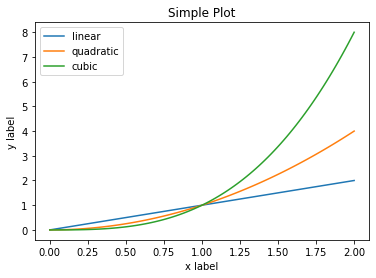

In [11]:
# 객체 지향 스타일 (OO-style)

x = np.linspace(0, 2, 100)

# 객체 지향 스타일이라고 할지라도 figure 생성시에는 pyplot을 사용한다.
fig, ax = plt.subplots() # figure, axes 생성
ax.plot(x, x, label='linear') # axes에 y=x 그래프 그리고 label을 'linear'로 함
ax.plot(x, x**2, label='quadratic') # axes에 y=x**2 그래프 그리고 label을 'quadratic'(2차)라고 함
ax.plot(x, x**3, label='cubic') # axes에 y=x**3 그래프 그리고 label을 'cubic'(3차)라고 함
ax.set_xlabel('x label') # axes의 x-label값 설정
ax.set_ylabel('y label') # axes의 y-label값 설정
ax.set_title("Simple Plot") # axes의 title을 설정
ax.legend() # axes의 legend(범례) 설정

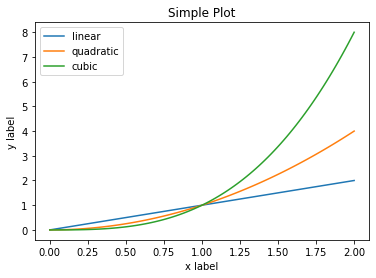

In [12]:
# pyplot 스타일

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

사실 3번째 방법도 있지만, 여기서는 언급하지 않는다...

- matplotlib's documentation과 예제는 객체지향과 pyplot 스타일을 모두 사용한다.
- 두가지 방식 모두 사용하는데 거리낌이 없어야하지만 섞어서 사용하기 보다는 하나의 방식을 고수하는 것이 좋다.
- 일반적으로 대화형플로팅(예. 주피터노트북)에서는 pyplot을 사용하고, 비대화형플로팅(함수와 코드가 재사용되는...)에서는 객체지향 스타일을 추천한다.

예전 예제에서는 from pylab import *을 사용하기도 했지만, 현재는 이러한 방식이 강력히 권해지지 않는다.

- 일반적으로 동일한 플롯을 반복해서 작성하지만(?), 데이터 세트가 다른 경우 그리기를 수행하기 위해서는 특수 함수를 작성해야 한다.
- 권장되는 함수 형식은 아래와 같습니다.

In [13]:
# axes, x data, y data, dict형태 param
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

위의 것을 사용시 아래와 같이 사용한다.

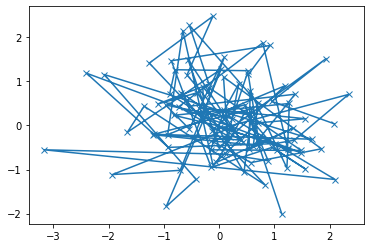

In [14]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

2개의 subplot이 있을 경우

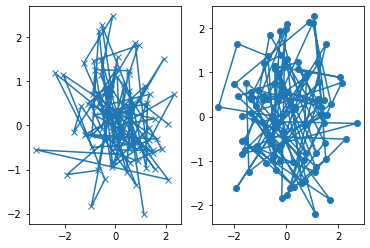

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

이러한 방식이 힘들어 보일 수 있지만, 그래프가 복잡해지는 경우 효과를 발휘한다.